구글 코랩에서 한글 문제 해결
- 아래 코드 설치를 한다.
- 코랩 런타임 -> 런타임 다시 시작한다

다시 임포트 하는 과정이 필요한듯

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,738 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

###구글 드라이브 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/colab/dataanalysis

Mounted at /content/drive
/content/drive/MyDrive/colab/dataanalysis


### import   

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

https://kosis.kr/search/search.do

In [32]:
df_kosis = pd.read_csv('./data/행정구역_시군구_별__성별_인구수_2020.csv', encoding='cp949') # UnicodeDecodeError:  -> 유니코드로 인코딩이 안된다.
df_kosis.head()

,행정구역(시군구)별,2020,2020.1,2020.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51829023,25841029,25987994
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237


In [7]:
df_kosis.tail()

,행정구역(시군구)별,2020,2020.1,2020.2
14,전라북도,1804104,896874,907230
15,전라남도,1851549,930615,920934
16,경상북도,2639422,1329211,1310211
17,경상남도,3340216,1681423,1658793
18,제주특별자치도,674635,338609,336026


In [8]:
df_kosis.sample()

,행정구역(시군구)별,2020,2020.1,2020.2
6,광주광역시,1450062,717348,732714


In [9]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  19 non-null     object
 1   2020        19 non-null     object
 2   2020.1      19 non-null     object
 3   2020.2      19 non-null     object
dtypes: object(4)
memory usage: 736.0+ bytes


In [10]:
df_kosis.describe()

,행정구역(시군구)별,2020,2020.1,2020.2
count,19,19,19,19
unique,19,19,19,19
top,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
freq,1,1,1,1


In [11]:
# 행정구역이 몇개로 나누어져있는지 확인
df_kosis.columns # 1이면 남자 2면 여자

Index(['행정구역(시군구)별', '2020', '2020.1', '2020.2'], dtype='object')

In [12]:
df_kosis['행정구역(시군구)별'].unique()

array(['행정구역(시군구)별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [33]:
# 0번째 인덱스의 row 제거(행정구역(시군구)별 제거)
df = df_kosis[df_kosis['행정구역(시군구)별']!='행정구역(시군구)별'].copy()
df.head()

,행정구역(시군구)별,2020,2020.1,2020.2
1,전국,51829023,25841029,25987994
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237
5,인천광역시,2942828,1473943,1468885


In [34]:
# 전국 row 제거 : 전국	51829023	25841029	25987994
df = df[df['행정구역(시군구)별' ]!= '전국'].copy()
df.head()

,행정구역(시군구)별,2020,2020.1,2020.2
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237
5,인천광역시,2942828,1473943,1468885
6,광주광역시,1450062,717348,732714


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     object
 2   2020.1      17 non-null     object
 3   2020.2      17 non-null     object
dtypes: object(4)
memory usage: 680.0+ bytes


In [27]:
df['2020']

2      9668465
3      3391946
4      2418346
5      2942828
6      1450062
7      1463882
8      1136017
9       355831
10    13427014
11     1542840
12     1600837
13     2121029
14     1804104
15     1851549
16     2639422
17     3340216
18      674635
Name: 2020, dtype: object

In [42]:
# 행정구역(시군구)별, 2020 대상의 데이터를 가져오기

# df_2020 = df[['행정구역(시군구)별','2020']] # 행일 때 슬라이싱 가능함. 컬럼일때는 패싱 인덱싱을 이용해서 가지고 올 수 있다.

# df_2020 = df.iloc[:,0:2]

# df_2020 = df.iloc[:,[0:1]]

df_2020 = df.loc[:,'행정구역(시군구)별':'2020']


df_2020 #2020만 저장되어 있는 상태

,행정구역(시군구)별,2020
2,서울특별시,9668465
3,부산광역시,3391946
4,대구광역시,2418346
5,인천광역시,2942828
6,광주광역시,1450062
7,대전광역시,1463882
8,울산광역시,1136017
9,세종특별자치시,355831
10,경기도,13427014
11,강원도,1542840


In [43]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     object
dtypes: object(2)
memory usage: 408.0+ bytes


In [57]:
print(dir(plt))

['Annotation', 'Arrow', 'Artist', 'AutoLocator', 'Axes', 'Button', 'Circle', 'Figure', 'FigureCanvasBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'Number', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotTool', 'Text', 'TickHelper', 'Widget', '_INSTALL_FIG_OBSERVER', '_IP_REGISTERED', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_auto_draw_if_interactive', '_backend_mod', '_get_running_interactive_framework', '_interactive_bk', '_log', '_pylab_helpers', '_setp', '_setup_pyplot_info_docstrings', '_show', 'acorr', 'angle_spectrum', 'annotate', 'arrow', 'autoscale', 'autumn', 'axes', 'axhline', 'axhspan', 'axis', 'axvline', 'a

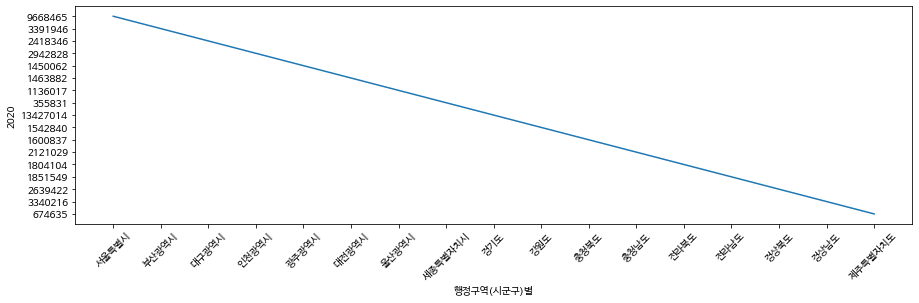

In [65]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,4))
# plt.xticks(rotation=45) # 글씨가 겹치지 않도로 약간 회전을 준다.
# plt.plot(df['행정구역(시군구)별'],df['2020'])

# y축에 있는 값은 숫자여야 한다. 근데 지금은 데이터 타입이 오브젝트임
sns.lineplot(data=df,x='행정구역(시군구)별', y='2020')

# plt.plot([1,2,3,4,5])
plt.show()

In [89]:
# '2020', '202.1', '2020.2' 컬럼의 데이터를 int로 변환한다.
df['2020'] = [int(i) for i in df['2020']]
df['2020.1'] = [int(i) for i in df['2020.1']]
df['2020.2'] = [int(i) for i in df['2020.2']]


# 아래 방법은 복잡하니까 사용하지 말자..
# s = [(int(i), int(j), int(k)) for i,j,k in zip(df['2020'],df['2020.1'],df['2020.2'])]
# p = np.array(s)
# df['2020'],df['2020.1'],df['2020.2'] = p[:,0],p[:,1],p[:,2]
# df['2020']
###########
df['2020']

2      9668465
3      3391946
4      2418346
5      2942828
6      1450062
7      1463882
8      1136017
9       355831
10    13427014
11     1542840
12     1600837
13     2121029
14     1804104
15     1851549
16     2639422
17     3340216
18      674635
Name: 2020, dtype: int64

In [90]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     int64 
 2   2020.1      17 non-null     int64 
 3   2020.2      17 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 680.0+ bytes


In [92]:
df_2020=df[['행정구역(시군구)별','2020']]

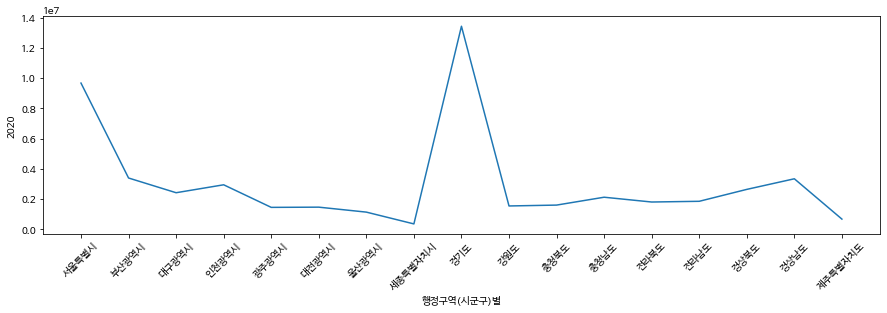

In [95]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,4))
plt.xticks(rotation=45) 

#################### 
# plt.plot(df['행정구역(시군구)별'],df['2020'])
# plt.xlabel('행정구역(시군구)별')
# plt.ylabel('2020')
############################

sns.lineplot(data=df,x='행정구역(시군구)별', y='2020')
plt.show()

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,4))
plt.xticks(rotation=45) 
sns.pointplot(data=df, x='행정구역(시군구)별', y='')

출생아수_시도사균슈1997_2021

In [96]:
df_kosis = pd.read_csv('./data/출생아수_시도_시_군_구_1997_2021.csv', encoding='cp949')
df_kosis

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2021.09.2,2021.10,2021.10.1,2021.10.2,2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10743,20749,10598,10151,19829,10201,9628,17179,8725,8454
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,1814,3533,1839,1694,3513,1818,1695,3034,1557,1477
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,627,1183,603,580,1043,549,494,888,458,430
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,452,890,470,420,792,411,381,685,363,322
5,인천광역시,3646,1878,1768,3193,1646,1547,3466,1789,1677,...,661,1240,637,603,1189,597,592,959,483,476
6,광주광역시,2166,1106,1060,1910,985,925,2013,1030,983,...,349,604,295,309,661,343,318,474,250,224
7,대전광역시,2003,1055,948,1869,927,942,1894,947,947,...,291,592,316,276,560,300,260,509,252,257
8,울산광역시,1754,935,819,1569,838,731,1771,946,825,...,243,505,269,236,451,224,227,404,209,195
9,세종특별자치시,-,-,-,-,-,-,-,-,-,...,151,319,161,158,263,129,134,226,114,112


In [97]:
df_kosis.tail()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2021.09.2,2021.10,2021.10.1,2021.10.2,2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2
14,전라북도,2579,1362,1217,2261,1150,1111,2364,1186,1178,...,294,588,302,286,543,264,279,524,280,244
15,전라남도,2685,1413,1272,2547,1286,1261,2457,1246,1211,...,341,632,290,342,640,332,308,542,281,261
16,경상북도,3362,1802,1560,3257,1751,1506,3343,1754,1589,...,517,889,465,424,961,500,461,775,393,382
17,경상남도,4020,2171,1849,3796,2003,1793,4021,2122,1899,...,631,1238,630,608,1135,604,531,975,497,478
18,제주특별자치도,734,373,361,737,386,351,750,419,331,...,176,330,185,145,254,126,128,215,106,109


In [98]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 901 entries, 시군구별 to 2021.12.2
dtypes: object(901)
memory usage: 133.9+ KB


In [99]:
df_kosis.shape

(19, 901)

In [103]:
#모든 컬럼들이 보이도로 설정한다.
pd.options.display.max_columns=829

In [104]:
df_kosis.head(3)

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,1997.04,1997.04.1,1997.04.2,1997.05,1997.05.1,1997.05.2,1997.06,1997.06.1,1997.06.2,1997.07,1997.07.1,1997.07.2,1997.08,1997.08.1,1997.08.2,1997.09,1997.09.1,1997.09.2,1997.10,1997.10.1,1997.10.2,1997.11,1997.11.1,1997.11.2,1997.12,1997.12.1,1997.12.2,1998.01,1998.01.1,1998.01.2,1998.02,1998.02.1,1998.02.2,1998.03,1998.03.1,1998.03.2,1998.04,1998.04.1,1998.04.2,1998.05,1998.05.1,1998.05.2,1998.06,1998.06.1,1998.06.2,1998.07,1998.07.1,1998.07.2,1998.08,1998.08.1,1998.08.2,1998.09,1998.09.1,1998.09.2,1998.10,1998.10.1,1998.10.2,1998.11,1998.11.1,1998.11.2,1998.12,1998.12.1,1998.12.2,1999.01,1999.01.1,1999.01.2,1999.02,1999.02.1,1999.02.2,1999.03,1999.03.1,1999.03.2,1999.04,1999.04.1,1999.04.2,1999.05,1999.05.1,1999.05.2,1999.06,1999.06.1,1999.06.2,1999.07,1999.07.1,1999.07.2,1999.08,1999.08.1,1999.08.2,1999.09,1999.09.1,1999.09.2,1999.10,1999.10.1,1999.10.2,1999.11,1999.11.1,1999.11.2,1999.12,1999.12.1,1999.12.2,2000.01,2000.01.1,2000.01.2,2000.02,2000.02.1,2000.02.2,2000.03,2000.03.1,2000.03.2,2000.04,2000.04.1,2000.04.2,2000.05,2000.05.1,2000.05.2,2000.06,2000.06.1,2000.06.2,2000.07,2000.07.1,2000.07.2,2000.08,2000.08.1,2000.08.2,2000.09,2000.09.1,2000.09.2,2000.10,2000.10.1,2000.10.2,2000.11,2000.11.1,2000.11.2,2000.12,2000.12.1,2000.12.2,2001.01,2001.01.1,2001.01.2,2001.02,2001.02.1,2001.02.2,2001.03,2001.03.1,2001.03.2,2001.04,2001.04.1,2001.04.2,2001.05,2001.05.1,2001.05.2,2001.06,2001.06.1,2001.06.2,2001.07,2001.07.1,2001.07.2,2001.08,2001.08.1,2001.08.2,2001.09,2001.09.1,2001.09.2,2001.10,2001.10.1,2001.10.2,2001.11,2001.11.1,2001.11.2,2001.12,2001.12.1,2001.12.2,2002.01,2002.01.1,2002.01.2,2002.02,2002.02.1,2002.02.2,2002.03,2002.03.1,2002.03.2,2002.04,2002.04.1,2002.04.2,2002.05,2002.05.1,2002.05.2,2002.06,2002.06.1,2002.06.2,2002.07,2002.07.1,2002.07.2,2002.08,2002.08.1,2002.08.2,2002.09,2002.09.1,2002.09.2,2002.10,2002.10.1,2002.10.2,2002.11,2002.11.1,2002.11.2,2002.12,2002.12.1,2002.12.2,2003.01,2003.01.1,2003.01.2,2003.02,2003.02.1,2003.02.2,2003.03,2003.03.1,2003.03.2,2003.04,2003.04.1,2003.04.2,2003.05,2003.05.1,2003.05.2,2003.06,2003.06.1,2003.06.2,2003.07,2003.07.1,2003.07.2,2003.08,2003.08.1,2003.08.2,2003.09,2003.09.1,2003.09.2,2003.10,2003.10.1,2003.10.2,2003.11,2003.11.1,2003.11.2,2003.12,2003.12.1,2003.12.2,2004.01,2004.01.1,2004.01.2,2004.02,2004.02.1,2004.02.2,2004.03,2004.03.1,2004.03.2,2004.04,2004.04.1,2004.04.2,2004.05,2004.05.1,2004.05.2,2004.06,2004.06.1,2004.06.2,2004.07,2004.07.1,2004.07.2,2004.08,2004.08.1,2004.08.2,2004.09,2004.09.1,2004.09.2,2004.10,2004.10.1,2004.10.2,2004.11,2004.11.1,2004.11.2,2004.12,2004.12.1,2004.12.2,2005.01,2005.01.1,2005.01.2,2005.02,2005.02.1,2005.02.2,2005.03,2005.03.1,2005.03.2,2005.04,2005.04.1,2005.04.2,2005.05,2005.05.1,2005.05.2,2005.06,2005.06.1,2005.06.2,2005.07,2005.07.1,2005.07.2,2005.08,2005.08.1,2005.08.2,2005.09,2005.09.1,2005.09.2,2005.10,2005.10.1,2005.10.2,2005.11,2005.11.1,2005.11.2,2005.12,2005.12.1,2005.12.2,2006.01,2006.01.1,2006.01.2,2006.02,2006.02.1,2006.02.2,2006.03,2006.03.1,2006.03.2,2006.04,2006.04.1,2006.04.2,2006.05,2006.05.1,2006.05.2,2006.06,2006.06.1,2006.06.2,2006.07,2006.07.1,2006.07.2,2006.08,2006.08.1,2006.08.2,2006.09,2006.09.1,2006.09.2,2006.10,2006.10.1,2006.10.2,2006.11,2006.11.1,2006.11.2,2006.12,2006.12.1,2006.12.2,2007.01,2007.01.1,2007.01.2,2007.02,2007.02.1,2007.02.2,2007.03,2007.03.1,2007.03.2,2007.04,2007.04.1,2007.04.2,2007.05,2007.05.1,2007.05.2,2007.06,2007.06.1,2007.06.2,2007.07,2007.07.1,2007.07.2,2007.08,2007.08.1,2007.08.2,2007.09,2007.09.1,2007.09.2,2007.10,2007.10.1,2007.10.2,2007.11,2007.11.1,2007.11.2,2007.12,2007.12.1,2007.12.2,2008.01,2008.01.1,2008.01.2,2008.02,2008.02.1,2008.02.2,2008.03,2008.03.1,2008.03.2,2008.04,2008.04.1,2008.04.2,2008.05,2008.05.1,2008.05.2,2008.06,2008.06.1,2008.06.2,2008.07,2008.07.1,2008.07.2,2008.08,2008.08.1,2008.08.2,2008.09,2008.09.1,2008.09.2,2008.10,2008.10.1,2008.10.2,2008.11,2008.11.1,

In [106]:
df = df_kosis.melt(id_vars='시군구별') # melt는 데이터 구조를 바꿔서 사용할 수 있다.(데이터 재구조화)
df

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
...,...,...,...
17095,전라북도,2021.12.2,244
17096,전라남도,2021.12.2,261
17097,경상북도,2021.12.2,382
17098,경상남도,2021.12.2,478


In [107]:
# 지역에 상관없이 년도별로 데이터를 가져와야 하는 경우
df.shape

(17100, 3)

In [108]:
df['시군구별'].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [109]:
df[df['시군구별']=='시군구별'] 

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
19,시군구별,1997.01.1,남자 (명)
38,시군구별,1997.01.2,여자 (명)
57,시군구별,1997.02,계 (명)
76,시군구별,1997.02.1,남자 (명)
...,...,...,...
17005,시군구별,2021.11.1,남자 (명)
17024,시군구별,2021.11.2,여자 (명)
17043,시군구별,2021.12,계 (명)
17062,시군구별,2021.12.1,남자 (명)


In [110]:
# '시군구별' 아닌 데이터만 뽑아온다.
df = df[df['시군구별']!='시군구별'].copy()
df

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646
...,...,...,...
17095,전라북도,2021.12.2,244
17096,전라남도,2021.12.2,261
17097,경상북도,2021.12.2,382
17098,경상남도,2021.12.2,478


In [111]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      16200 non-null  object
 1   variable  16200 non-null  object
 2   value     16200 non-null  object
dtypes: object(3)
memory usage: 506.2+ KB


In [113]:
df.head()

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646


In [114]:
df.sample(5)

,시군구별,variable,value
3771,세종특별자치시,2002.07,-
7213,충청북도,2007.07.1,608
7711,경상북도,2008.04,2034
7095,울산광역시,2007.05.1,532
12576,경상남도,2015.05.1,1285


In [129]:
# 남녀를 구별해서 출력
#Series 으로 리턴
print(type(df['variable'])) # 시리즈

# Series에서 'str' 자원이 제공되는지 검색
print('str' in dir(pd.Series))


#StringMethods
print(type(df['variable'].str)) # 문자열로 변rud

# series으로 리턴
print(df['variable'].str.split('.'))
print(df['variable'].str.split('.')[1][0])
print(df['variable'].str.split('.')[1][1])

# print(df['variable'].str.split('.')[1][2]) # 범위가 벗어나서 오류가 발생됨


# DataFrame으로 리턴
print(type(df['variable'].str.split('.',expand=True)))
print(df['variable'].str.split('.',expand=True))

<class 'pandas.core.series.Series'>
True
<class 'pandas.core.strings.accessor.StringMethods'>
1           [1997, 01]
2           [1997, 01]
3           [1997, 01]
4           [1997, 01]
5           [1997, 01]
             ...      
17095    [2021, 12, 2]
17096    [2021, 12, 2]
17097    [2021, 12, 2]
17098    [2021, 12, 2]
17099    [2021, 12, 2]
Name: variable, Length: 16200, dtype: object
1997
01
<class 'pandas.core.frame.DataFrame'>
          0   1     2
1      1997  01  None
2      1997  01  None
3      1997  01  None
4      1997  01  None
5      1997  01  None
...     ...  ..   ...
17095  2021  12     2
17096  2021  12     2
17097  2021  12     2
17098  2021  12     2
17099  2021  12     2

[16200 rows x 3 columns]


In [130]:
df['연도'] = df['variable'].str.split('.',expand=True)[0]
df['월'] = df['variable'].str.split('.',expand=True)[1]
df['성별'] = df['variable'].str.split('.',expand=True)[2]

In [131]:
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997.01,63268,1997,01,None
2,서울특별시,1997.01,13205,1997,01,None
3,부산광역시,1997.01,4201,1997,01,None
4,대구광역시,1997.01,3345,1997,01,None
5,인천광역시,1997.01,3646,1997,01,None


In [132]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
5544,전라남도,2005.02,1328,2005,02,None
16282,제주특별자치도,2020.10.1,159,2020,10,1
13960,전라북도,2017.05.2,482,2017,05,2
3490,충청남도,2002.02,1659,2002,02,None
15164,서울특별시,2019.03,4811,2019,03,None


In [133]:
# 성별에 Non이 포함되여 있다.
df['성별'].unique()

array([None, '1', '2'], dtype=object)

In [134]:
# 성별에 unique 개수만 리턴한다.
df['성별'].nunique()

2

In [137]:
df['성별'].value_counts()

1    5400
2    5400
Name: 성별, dtype: int64

In [138]:
# null값을 '전체'로 바꿔 준다.
df['성별']=df['성별'].fillna('전체') 

In [139]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
1376,울산광역시,1999.01,1439,1999,01,전체
11247,제주특별자치도,2013.06,404,2013,06,전체
3802,서울특별시,2002.07.2,3911,2002,07,2
3609,제주특별자치도,2002.04,546,2002,04,전체
17072,경기도,2021.12.1,2598,2021,12,1


In [145]:
# 시리즈.. 오브젝트 1을 남으로 바꾸겠다. 리턴값은 시리즈
df['성별'] = df['성별'].replace('1','남').replace('2','여')
# a = df['성별'] = df['성별'].replace('1','남') # 리턴값을 받아서 연달아서 사용 가능

df['성별'].unique()

array(['전체', '남', '여'], dtype=object)

In [144]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
16773,전라남도,2021.07,749,2021,07,전체
6819,경상남도,2006.12.1,1204,2006,12,남
14833,충청남도,2018.09,1190,2018,09,전체
15239,전국,2019.04.1,13441,2019,04,남
745,대구광역시,1998.02,2960,1998,02,전체


In [146]:
# Series에서만 사용할 수 있다.
# 빈도수를 계산한다.
df['성별'].value_counts()

전체    5400
남     5400
여     5400
Name: 성별, dtype: int64

In [147]:
df.columns

Index(['시군구별', 'variable', 'value', '연도', '월', '성별'], dtype='object')

In [152]:
# inplace=True를 하게 되면 할당을 하지 않아도 데이터에 바로 적용이 된다. 디폴드 값은 False
# df.rename(columns={'variable' :'기간','value':'출생아수'}, inplace=True)
df = df.rename(columns={'variable' :'기간','value':'출생아수'}) # 할당을 해야 실제 데이터에 적용이 된다.

# 행을 바꿀것인지 열을 바꿀 것인지,, 반드시 속성 하나는 들어가야 한다. 행은 0, 열은 1이다.
# df = df.rename(mapper={'variable' :'기간','value':'출생아수'}, axis=1)

df

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체
...,...,...,...,...,...,...
17095,전라북도,2021.12.2,244,2021,12,여
17096,전라남도,2021.12.2,261,2021,12,여
17097,경상북도,2021.12.2,382,2021,12,여
17098,경상남도,2021.12.2,478,2021,12,여


In [153]:
df['출생아수'].unique()

array(['63268', '13205', '4201', ..., '106', '8454', '2612'], dtype=object)

In [160]:
# '출생아수' 컬럼에서 '-'을 찾기 위한 작업
df.sample(10)

,시군구별,기간,출생아수,연도,월,성별
1049,대구광역시,1998.07.1,1321,1998,07,남
14007,대구광역시,2017.06.2,686,2017,06,여
12391,부산광역시,2015.02.1,1082,2015,02,남
4949,세종특별자치시,2004.03.2,-,2004,03,여
1562,대구광역시,1999.04.1,1379,1999,04,남
10974,강원도,2013.01.1,568,2013,01,남
4694,전국,2003.11.1,21243,2003,11,남
252,인천광역시,1997.05.1,1619,1997,05,남
5749,강원도,2005.05.2,485,2005,05,여
12969,강원도,2015.12.1,427,2015,12,남


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    16200 non-null  object
 1   기간      16200 non-null  object
 2   출생아수    16200 non-null  object
 3   연도      16200 non-null  object
 4   월       16200 non-null  object
 5   성별      16200 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [162]:
np.nan

nan

In [163]:
df['출생아수'] = df['출생아수'].replace('-', np.nan)

In [170]:
df.sample(5)

,시군구별,기간,출생아수,연도,월,성별
3467,세종특별자치시,2002.01.2,NaN,2002,01,여
15202,서울특별시,2019.03.2,2292,2019,03,여
16202,전라북도,2020.09,699,2020,09,전체
8255,세종특별자치시,2009.01.2,NaN,2009,01,여
7300,대구광역시,2007.09,2031,2007,09,전체


In [172]:
# 출생아 수 NaN를 int 로 데이터 타입을 변경하기...인데 NaN은 float 타입으로만 변경 가능하다고
# df['출생아수'].astype(int)

df['출생아수']=df['출생아수'].astype(float) # float로 변경했음.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    16200 non-null  object 
 1   기간      16200 non-null  object 
 2   출생아수    15660 non-null  float64
 3   연도      16200 non-null  object 
 4   월       16200 non-null  object 
 5   성별      16200 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [175]:
df.sample(10) # NaN를 0.0 이렇게 변경하는게 아니라 그냥 타입을 float로 바꾼듯

,시군구별,기간,출생아수,연도,월,성별
13554,대전광역시,2016.10.2,464.0,2016,10,여
1604,울산광역시,1999.05,1348.0,1999,05,전체
14105,대전광역시,2017.08.1,527.0,2017,08,남
290,인천광역시,1997.06,2896.0,1997,06,전체
8377,경상남도,2009.03.2,1330.0,2009,03,여
1927,울산광역시,1999.10.2,677.0,1999,10,여
3204,충청북도,2001.09,1463.0,2001,09,전체
8477,부산광역시,2009.05.2,1047.0,2009,05,여
7399,울산광역시,2007.10.2,537.0,2007,10,여
6009,인천광역시,2005.10.1,981.0,2005,10,남


In [176]:
df['출생아수'].describe()

count    15660.000000
mean      2954.615581
std       6495.725504
min         30.000000
25%        604.000000
50%       1002.000000
75%       1875.250000
max      63268.000000
Name: 출생아수, dtype: float64

### 전국별 성별 전체   

In [182]:
df_all=df[df['성별']=='전체']
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체


In [183]:
df_all['성별'].unique()

array(['전체'], dtype=object)

In [186]:
df_all = df[(df['시군구별'] == '전국') & (df['성별']=='전체')]
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체


In [187]:
print(df_all['시군구별'].unique())
print(df_all['성별'].unique())

['전국']
['전체']


### 전국_전체 pandas를 통한 시각화 작

In [199]:
df_all.sample(5)

,시군구별,기간,출생아수,연도,월,성별
457,전국,1997.09,55461.0,1997,09,전체
7696,전국,2008.04,38783.0,2008,04,전체
6157,전국,2006.01,40692.0,2006,01,전체
2737,전국,2001.01,56949.0,2001,01,전체
5986,전국,2005.10,37283.0,2005,10,전체


In [200]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1 to 17044
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    300 non-null    object 
 1   기간      300 non-null    object 
 2   출생아수    300 non-null    float64
 3   연도      300 non-null    object 
 4   월       300 non-null    object 
 5   성별      300 non-null    object 
dtypes: float64(1), object(5)
memory usage: 16.4+ KB


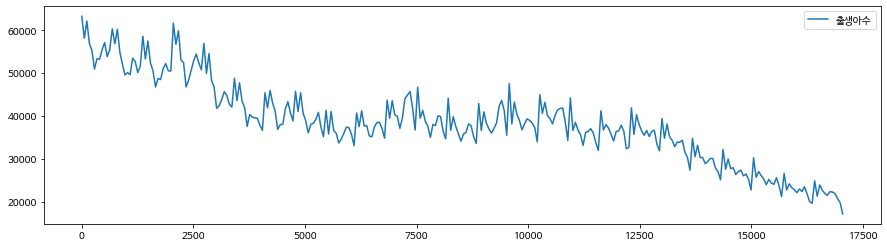

In [201]:
df_all.plot(figsize=(15,4)) # 판다스에서 제공하는 PLOT,, 인덱스 값이 x 축의 눈금을 잡히고 출생아 수는 y축으로 잡힙

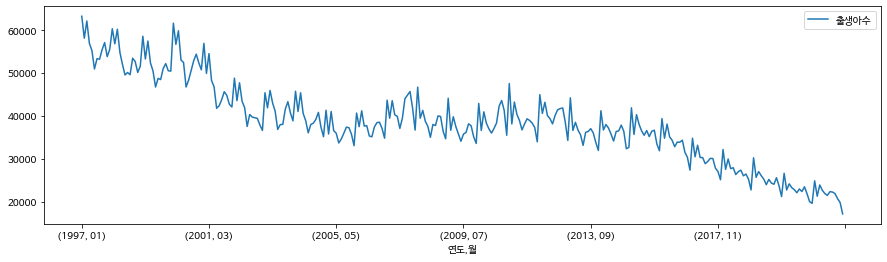

In [214]:
df_all.set_index(['연도','월']).plot(figsize=(15,4)) # y축을 설정하는건가??
# plt.show()

In [215]:
# df.info()

In [216]:
# 설정 인덱스를 원상복귀 시켜준다. (즉 연도와 월을 컬럼으로 되돌린다.)
df_all.reset_index(drop=True) # 인덱스가 없어짐

,시군구별,기간,출생아수,연도,월,성별
0,전국,1997.01,63268.0,1997,01,전체
1,전국,1997.02,58144.0,1997,02,전체
2,전국,1997.03,62160.0,1997,03,전체
3,전국,1997.04,56949.0,1997,04,전체
4,전국,1997.05,55270.0,1997,05,전체
...,...,...,...,...,...,...
295,전국,2021.08,22282.0,2021,08,전체
296,전국,2021.09,21905.0,2021,09,전체
297,전국,2021.10,20749.0,2021,10,전체
298,전국,2021.11,19829.0,2021,11,전체


In [217]:
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체


In [218]:
df_all.iloc[:,0:] # 인덱스는 컬럼이 아니여서 이거를 포함해서 계산을 하면 안된다.

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체
...,...,...,...,...,...,...
16816,전국,2021.08,22282.0,2021,08,전체
16873,전국,2021.09,21905.0,2021,09,전체
16930,전국,2021.10,20749.0,2021,10,전체
16987,전국,2021.11,19829.0,2021,11,전체


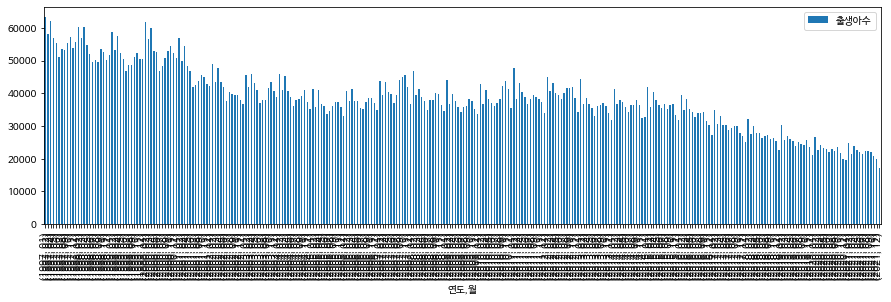

In [219]:
# 막대 그래프는 x 축에도 ㅇㄴ도, 월은 모두 표현한다.
# df_all.set_index(['연도','월']).plot(kind='bar', figsize=(15,4)) 
df_all.set_index(['연도','월']).plot.bar(figsize=(15,4)) 

In [222]:
# 최근 2년것만 가져오기
df_all[-24:]

In [223]:
df_all['연도'].unique()

array(['2020', '2021'], dtype=object)

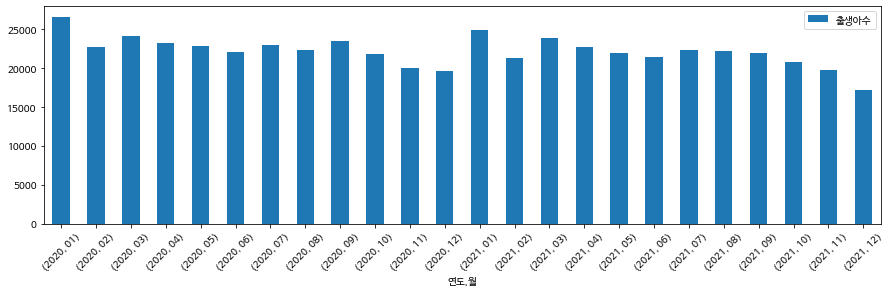

In [227]:
# 최근 2년 (24개만) 가져와서 그래프로 그려준다.
df_all[-24:].set_index(['연도', '월']).plot(kind='bar',figsize=(15,4), rot=45)
# plt.show()

In [ ]:
# seaborn으로 생성하기